# Name: Mahin Mia
# ID: 2021-1-60-044

1.Uploading the API Token to Colab

Uploading the kaggle.json file by running the following code:

In [1]:
from google.colab import files
files.upload()  # Choose the kaggle.json file from your local machine


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mahinmia","key":"bc96608103f3dac32feff16a64c55ace"}'}

2.Configure Kaggle and Download the Dataset

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


3.Download the Mango Leaf Disease dataset:

In [3]:
!kaggle datasets download -d aryashah2k/mango-leaf-disease-dataset


Dataset URL: https://www.kaggle.com/datasets/aryashah2k/mango-leaf-disease-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 94% 97.0M/103M [00:01<00:00, 80.1MB/s]
100% 103M/103M [00:01<00:00, 75.6MB/s] 


4.Extract the downloaded dataset:

In [5]:
import zipfile

with zipfile.ZipFile("mango-leaf-disease-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("mango_leaf_data")


# Exploratory Data Analysis (EDA)
# Load and Preprocess the Images

In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to the dataset and image size
data_dir = "mango_leaf_data"
image_size = (64, 64)

# Prepare lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img.flatten())
                labels.append(label)

# Convert lists to arrays
X = np.array(images)
y = np.array(labels)


# Encodeing the Labels

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Split the Data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6491666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.64      0.61       150
           1       0.70      0.70      0.70       149
           2       0.88      0.87      0.88       167
           3       0.76      0.77      0.77       148
           4       0.43      0.50      0.46       134
           5       0.62      0.60      0.61       159
           6       0.61      0.56      0.58       135
           7       0.58      0.51      0.54       158

    accuracy                           0.65      1200
   macro avg       0.65      0.64      0.64      1200
weighted avg       0.65      0.65      0.65      1200



# Visualize the Decision Tree

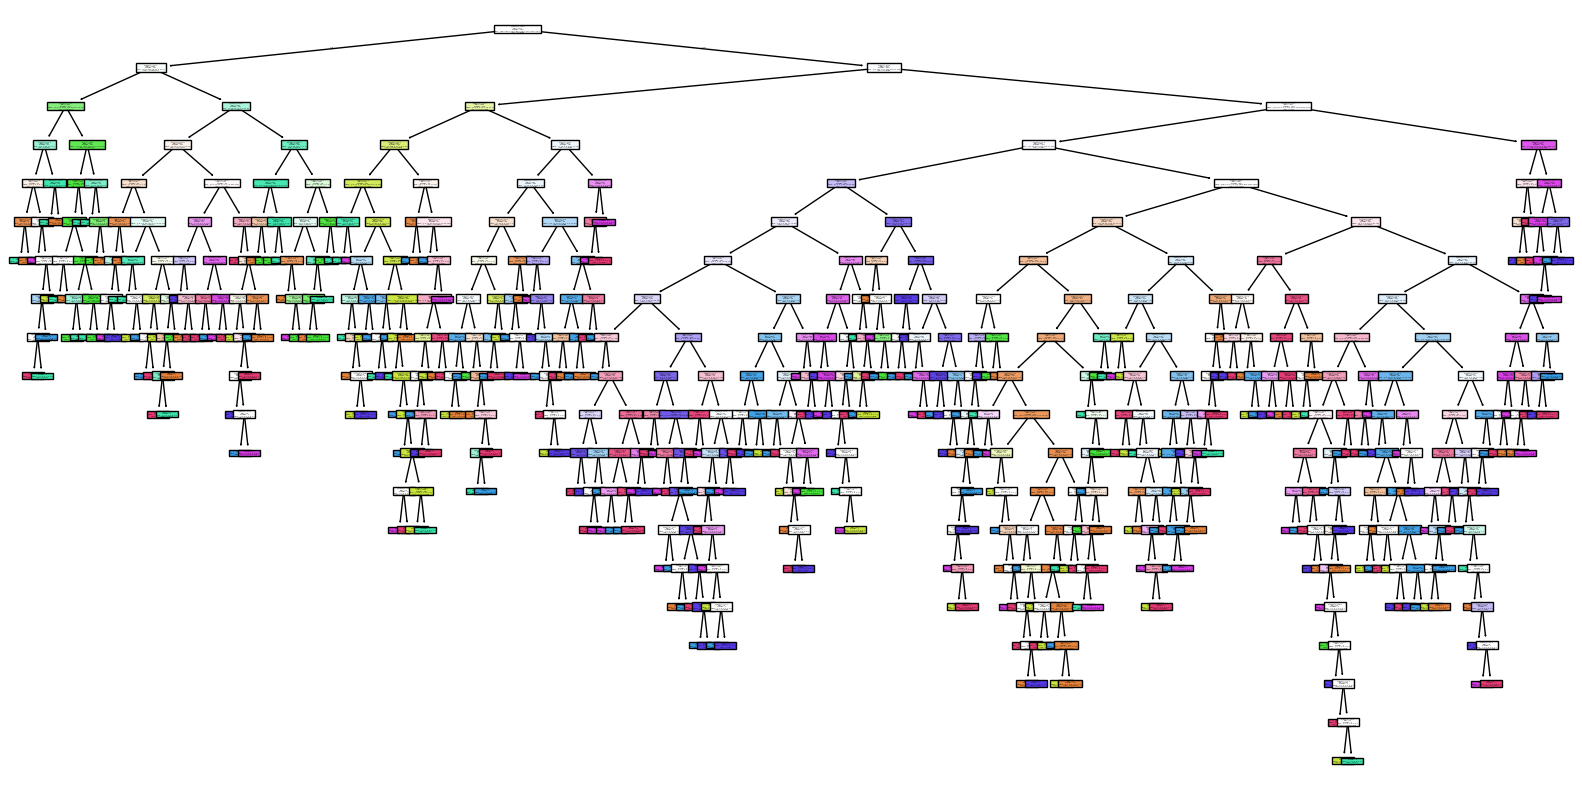

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, class_names=label_encoder.classes_, feature_names=None)
plt.show()


The Decision Tree analysis presents a tree like structure that partitions a data set on the basis of condition on features. Internal nodes need to be used for decision making, branches for consequence leading and the last nodes are for the predicted class. To some degree, color-coding corresponds with class distribution, and deeper branches where entities are found indicate that a decision was made. It shows how Do-It-Yourself companies can be classified using the framework.

# Load and Preprocess Images for Random Forest

In [18]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the path to the dataset and image size
data_dir = "mango_leaf_data"
image_size = (64, 64)

# Prepare lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for label_folder in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label_folder)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                images.append(img.flatten())
                labels.append(label_folder)

# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Encode labels as integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train the Random Forest Classifie

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.8891666666666667

Classification Report:
                   precision    recall  f1-score   support

     Anthracnose       0.90      0.91      0.91       150
Bacterial Canker       0.88      0.93      0.90       149
  Cutting Weevil       0.95      0.98      0.97       167
        Die Back       0.96      0.93      0.95       148
      Gall Midge       0.73      0.80      0.76       134
         Healthy       0.89      0.90      0.89       159
  Powdery Mildew       0.91      0.84      0.88       135
     Sooty Mould       0.88      0.80      0.83       158

        accuracy                           0.89      1200
       macro avg       0.89      0.89      0.89      1200
    weighted avg       0.89      0.89      0.89      1200



# Bar Chart of Class-Wise Accuracy

<ipython-input-20-0c557de8bfcf>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_encoder.classes_, y=f1_scores, palette='viridis')


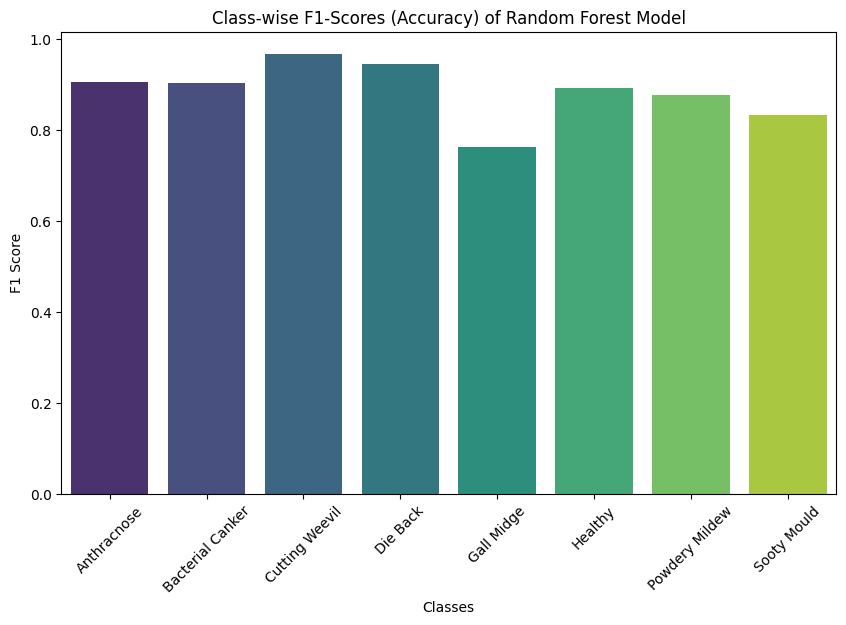

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Generate classification report as a dictionary
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

# Extract F1-scores for each class
f1_scores = [report[label]['f1-score'] for label in label_encoder.classes_]

# Create a bar chart for class-wise F1-scores
plt.figure(figsize=(10, 6))
sns.barplot(x=label_encoder.classes_, y=f1_scores, palette='viridis')
plt.title("Class-wise F1-Scores (Accuracy) of Random Forest Model")
plt.xlabel("Classes")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.show()


This bar plot automatically generated from code describes the class-wise F1-scores of the Random Forest model and measures how the model performs in terms of precision and recall for each class. Applications on the X-axis include the classes (Anthracnose, Healthy), and their F1 scores varying from 0 to 1 at the Y axis. Overall all classes are quite good with majority of them having accuracies greater than 0.8 with the lowest being the “Gall Midge” class. For the values of score, the bars utilize a gradient from the ‘viridis’ palette. Predictably, a comment placed at the very beginning of the script advises on changing the code for future compatibility with Seaborn.

# Plot Overall Accuracy with Varying

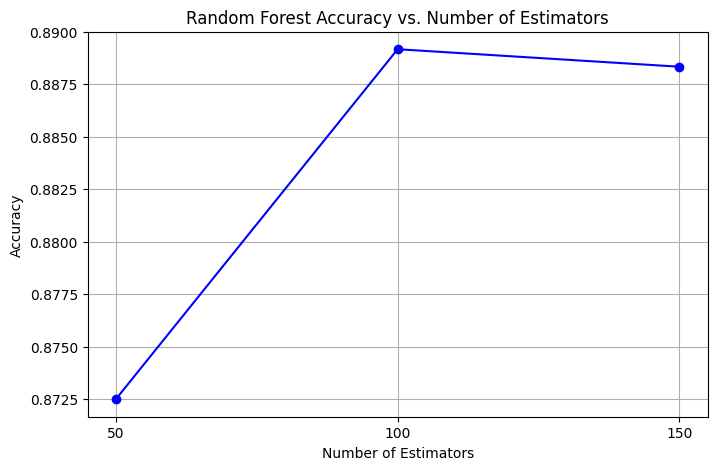

In [21]:
# Define a list of n_estimators values and store accuracies
n_estimators_list = [50, 100, 150]
accuracy_list = []

for n in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

# Plotting the accuracy for each n_estimators
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, accuracy_list, marker='o', linestyle='-', color='b')
plt.title("Random Forest Accuracy vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.xticks(n_estimators_list)
plt.grid()
plt.show()


This plot illustrates the effect of the number of trees on the Random Forest model’s accuracy of the predictions it makes. For instance, with 50 trees, the model can achieve an accuracy of about 0.889, though using more trees (for example 100) boosts an accuracy to 0.89. Nevertheless, increasing to 150 trees slightlyitize the accuracy, and this shows that increasing the number of trees does not necessarily mean better performance. This means that the model is fine as long as so many trees are not added since adding more trees will not necessarily enhance its accuracy.

# Evaluate Both Models

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and predict with Decision Tree
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_report = classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_, output_dict=True)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Train and predict with Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_, output_dict=True)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Extract F1-scores for each class
dt_f1_scores = [dt_report[label]['f1-score'] for label in label_encoder.classes_]
rf_f1_scores = [rf_report[label]['f1-score'] for label in label_encoder.classes_]


# Plot Class-wise F1 Scores Comparison

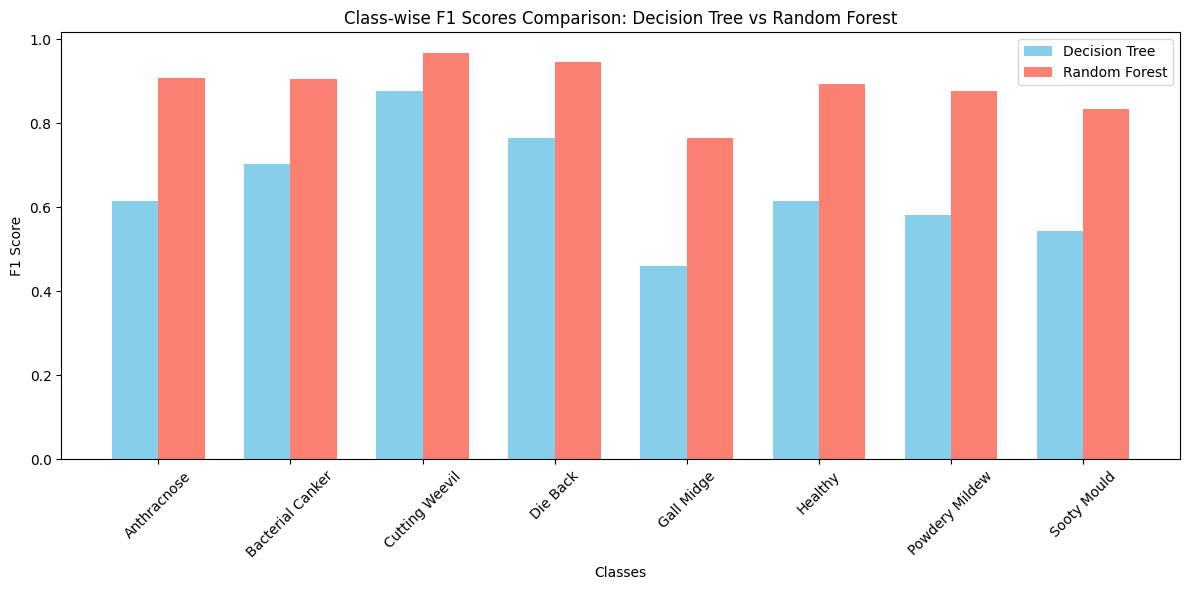

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(label_encoder.classes_))

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(index, dt_f1_scores, bar_width, label="Decision Tree", color="skyblue")
plt.bar(index + bar_width, rf_f1_scores, bar_width, label="Random Forest", color="salmon")

# Labeling
plt.xlabel("Classes")
plt.ylabel("F1 Score")
plt.title("Class-wise F1 Scores Comparison: Decision Tree vs Random Forest")
plt.xticks(index + bar_width / 2, label_encoder.classes_, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


This bar plot compares the class-wise F1-scores between two models: Decision Tree (blue) and Random Forest Algorithms (red). The percent accuracy of both models within each class on the X-axis (Anthracnose, Gall Midge and etc.) is indicated. On the Y-axis, F1-scores are shown, so if the bars are higher means better performance.

Even in most of the cases, Random Forest model (red) is more accurate than the Decision Tree model (blue), which signifies that Random Forest is better. For example, one can observe this in largely different values of the Random Forest’s scores in classes such as Anthracnose and Gall Midge. This gives an implication that implementing a number of trees in Random Forest is more accurate than voting a single tree in Decision Tree.

# Plot Overall Accuracy Comparison

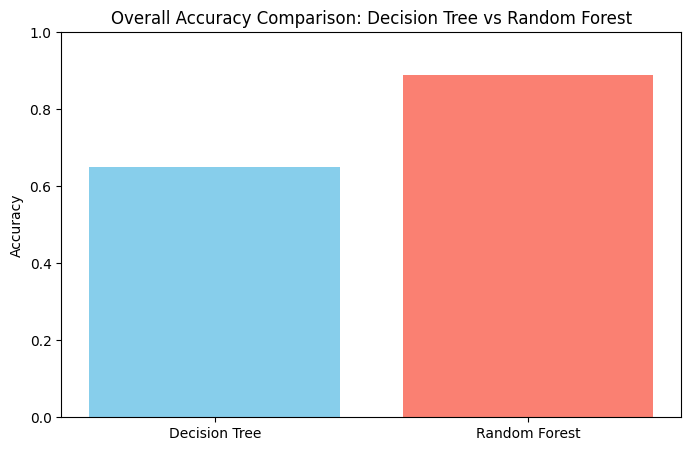

In [25]:
# Accuracy values for both models
model_names = ["Decision Tree", "Random Forest"]
accuracies = [dt_accuracy, rf_accuracy]

# Create the plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=["skyblue", "salmon"])
plt.ylabel("Accuracy")
plt.title("Overall Accuracy Comparison: Decision Tree vs Random Forest")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


The bar chart presents a comparison in the level of overall accuracy between two instances of machine learning. Decision Tree & Random Forest, the accuracy of Random Forest model is significantly higher than the Decision Tree which is approximately around 70%. This means that Random Forest is more suitable for given task, one of the reasons can be explained by the fact that Random Forest is an ensemble methods that uses decision trees.

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
# Generate predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Create confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)


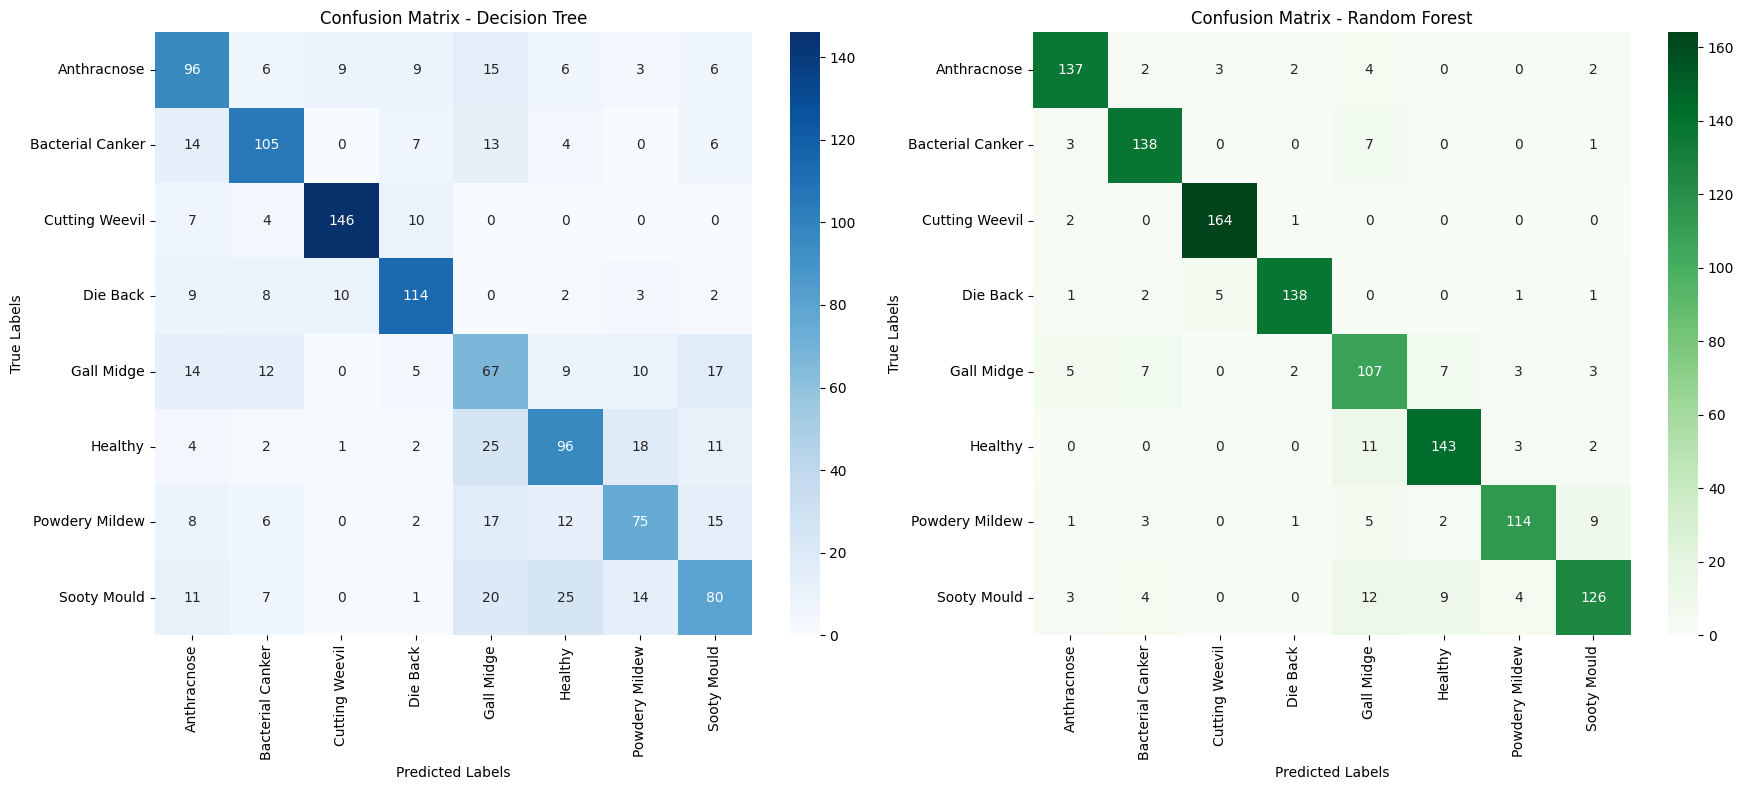

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot confusion matrix for Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[0])
axes[0].set_title("Confusion Matrix - Decision Tree")
axes[0].set_xlabel("Predicted Labels")
axes[0].set_ylabel("True Labels")

# Plot confusion matrix for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=axes[1])
axes[1].set_title("Confusion Matrix - Random Forest")
axes[1].set_xlabel("Predicted Labels")
axes[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()


## Decision Tree Confusion Matrix
What we see in the Decision Tree model is fairly decent performance particularly with classes such as the “Cutting Weevil” whereby most of the results are accurate and so for the “Die Back” results. However, in some other cases, especially “Anthracnose” and “Gall Midge,” Tang et al. work has poor results with a high number of misclassifications. This suggests that the Decision Tree may fit some data patterns to an extreme where it will be misled when it encounters visually similar classes.

## Random Forest Confusion Matrix
The abbreviation Random Forest proves much better than other models with most of the dots close to the diagonal line, which sign a maximum level of accuracy in the vast majority of classes. Incorrect estimations are lesser, even for difficult categories, such as “Gall Midge” and “Sooty Mould.” These of the aspects make the model more generalized by ensembling hence avoiding instances of overfitting and leading to a balanced performance.

## Comparison
Finally, while comparing the Random Forest model with the Decision Tree, Random Forest has relatively fewer errors and better consistency among classes. That is why it is more effective in identifying the diseases of mango leaves due to the fact that it is an ensemble system.